# Lesson 7: Intro To Classification
## Solution code for guided practice & demos

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn import cross_validation, datasets, grid_search, neighbors, metrics
%matplotlib inline

# Config
sns.set_style("darkgrid")
DATA_DIR = Path('.')
np.random.seed(1)

## Slide: "Build a classifier!"

In [3]:
# Load iris data
# More info: https://en.wikipedia.org/wiki/Iris_flower_data_set
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Add target col from iris_data object
iris['target'] = iris_data.target

print iris.describe()
iris.head()

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Axes(0.125,0.125;0.775x0.775)


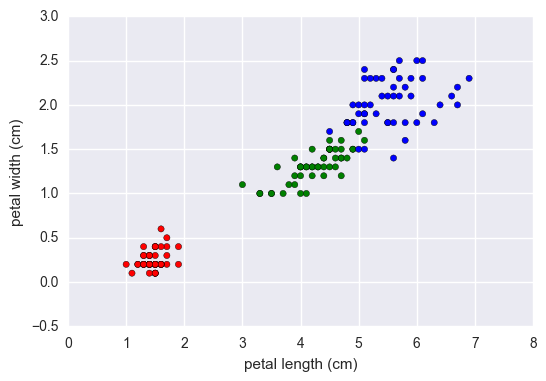

In [4]:
# Map colours to the target numbers
cmap = {'0': 'r', '1': 'g', '2': 'b' }
iris['ctarget'] = iris['target'].apply(lambda x: cmap[str(x)])

# Visualise
print iris.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=iris.ctarget)

In [5]:
# Super simple classifier, will get red (0) points, but label all green (1) & blue (2) points with a "1"
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

iris['predictions'] = iris.apply(my_classifier, axis=1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,ctarget,predictions
0,5.1,3.5,1.4,0.2,0,r,0
1,4.9,3.0,1.4,0.2,0,r,0
2,4.7,3.2,1.3,0.2,0,r,0
3,4.6,3.1,1.5,0.2,0,r,0
4,5.0,3.6,1.4,0.2,0,r,0


In [6]:
# Accuracy = "what percent were correctly predicted?"
print float(len(iris[iris.target == iris.predictions])) / len(iris)

0.666666666667


## Activity: "Build a classifier!"

1. Re-explore the iris dataset and build a program that classifies each data point.  Use if-else statements and Pandas functions only.
2. Measure the accuracy of your classifier using the calculation “total correct over total samples”.
3. Your classifier should be able to:
  - Get one class label 100% correct (one type of iris is easily distinguishable from the other two).
  - Accurately predict the majority of the other two classes with some error (note: the samples for the remaining class labels are a little intertwined, so you may need to generalise).
  
Additional questions to think about:
- How simple could the if-else classifier be while remaining relatively accurate?
- How complicated could our if-else classifier be and remain completely accurate? How many if-else statements would you need, or nested if-else statements, in order to get the classifier 100% accurate? (e.g. the classifier above uses two if-else statements).
- Which if-else classifier would work better against iris data that it hasn't seen? Why is that the case?

### Solution

For this exercise the solution is as simple it really needs to be in order to get a very good prediction score. Some things to think about:
  - Why, or when, does this fail?
  - What attributes make this a great data set for learning classification algorithms?
  - What makes it not as great?

In [7]:
# Solution code
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row['petal length (cm)'] < 5:
        return 1
    else:
        return 2

iris['predictions'] = iris.apply(my_classifier, axis=1)
print "Accuracy = ", float(len(iris[iris.target == iris.predictions])) / len(iris)

Accuracy =  0.946666666667


## Slide: "Demo - KNN in action"

### Using distance: KNN implementation

In [8]:
# Drop cols we don't need
iris.drop(['ctarget', 'predictions'], axis=1, inplace=True)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Fit knn (k=5, uniform weights) to petal length/width only from iris data
X = iris[['petal length (cm)', 'petal width (cm)']]
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X, y)

print "knn predictions"
print knn.predict(X)
print

print "iris target actuals"
print y.values
print

print "Accuracy = ", knn.score(X, y)

knn predictions
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

iris target actuals
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Accuracy =  0.96


**Q. Do we see a change in performance when using the distance weight?**

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(X, y)
print knn.predict(X)
print y.values
print knn.score(X, y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


## Activity: "Solving for K"
One of the primary challenges of KNN is solving for k - how many neighbours do we use?

The smallest k we can use is 1.  However, using only one neighbour will probably perform poorly.

The largest k we can use is n-1 (every other point in the data set).  However, this would result in always choosing the largest class in the sample.  This would also perform poorly.

Use the starter code below and the iris data set to answer the following questions:
1. What is the accuracy for k=1?
2. What is the accuracy for k=n-1?
3. Using cross validation, what value of k optimises model accuracy.  Create a plot with k as the x-axis and accuracy as the y-axis (called a “fit chart”) to help find the answer.

**Bonus Questions:**
1. By default, the KNN classifier in sklearn uses the _Minkowski metric_ for distance.
  - What type of data does this metric work best for?
  - What type of data does this distance metric not work for?
  - You can read about distance metrics in the [sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
2. It is possible to use KNN as a regression estimator.  Determine the following:
  - Steps that KNN Regression would follow?
  - How it predicts a regression value?

### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive; note that the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [11]:
# Solution code

# This is only one approach to the problem, but adding in the 'distance' parameter
# (instead of uniform) would only be additive. Note the code would need some editing
# to handle it properly if done in the grid search; alternatively, make the change
# directly in the estimator.

# Tips:
# - Create some n_list!
# - Need to input your own params
# - Keep in mind cross validation.
# - Recall: what's an effective way to create a numerical list in Python?

# First, double check exactly what the default score is for neighbors.KNeighborsClassifier.score
# (i.e. is high score good or bad?) According to below, it's mean accuracy, i.e. high is good!
help(neighbors.KNeighborsClassifier.score)

Help on method score in module sklearn.base:

score(self, X, y, sample_weight=None) unbound sklearn.neighbors.classification.KNeighborsClassifier method
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [12]:
# First of all, let's see how training set accuracy changes as we vary k
training_set_errors = pd.DataFrame(columns=('k', 'accuracy'))
for k in range(2, 100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(X, y)
    training_set_errors.loc[k] = (k, knn.score(X, y))

training_set_errors.head()

,k,accuracy
2,2.0,0.973333
3,3.0,0.980000
4,4.0,0.973333
5,5.0,0.960000
6,6.0,0.966667


([<matplotlib.axis.XTick at 0x1064d0ed0>,
 <a list of 7 Text xticklabel objects>)

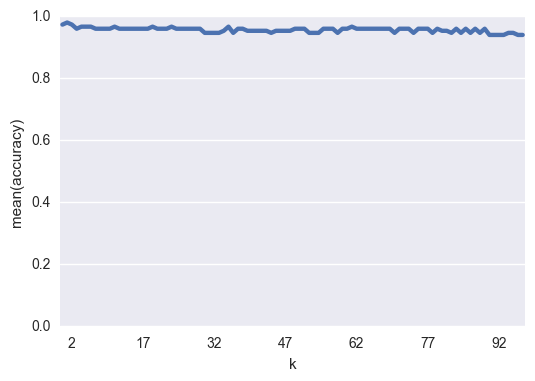

In [13]:
sns.pointplot(x='k', y='accuracy', data=training_set_errors, markers='')
plt.ylim(0, 1)
plt.xticks(np.arange(2, 100, 15), np.arange(2, 100, 15))

([<matplotlib.axis.XTick at 0x10b6cb410>,
 <a list of 7 Text xticklabel objects>)

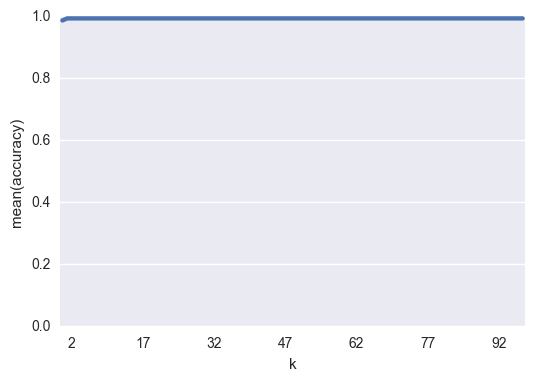

In [14]:
# For completeness, repeat with weights='distance'
training_set_errors = pd.DataFrame(columns=('k', 'accuracy'))
for k in range(2, 100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X, y)
    training_set_errors.loc[k] = (k, knn.score(X, y))

sns.pointplot(x='k', y='accuracy', data=training_set_errors, markers='')
plt.ylim(0, 1)
plt.xticks(np.arange(2, 100, 15), np.arange(2, 100, 15))

In [15]:
# OK, now let's get to the fun stuff, use GridSearch + 5-fold CV to see how test set error changes with k
k = range(2, 100)
params = {'n_neighbors': k}
np.random.seed(1)
kf = cross_validation.KFold(len(X), n_folds = 5, shuffle=True)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(weights='uniform'),
    param_grid=params,
    cv=kf,
)
gs.fit(X, y)

grid = pd.DataFrame(gs.grid_scores_)
grid['n_neighbors'] = grid['parameters'].apply(lambda x: x['n_neighbors'])
grid.head()

,parameters,mean_validation_score,cv_validation_scores,n_neighbors
0,{u'n_neighbors': 2},0.946667,"[1.0, 0.933333333333, 0.9, 0.933333333333, 0.9...",2
1,{u'n_neighbors': 3},0.946667,"[0.966666666667, 0.966666666667, 0.93333333333...",3
2,{u'n_neighbors': 4},0.946667,"[0.966666666667, 0.966666666667, 0.9, 0.933333...",4
3,{u'n_neighbors': 5},0.966667,"[0.966666666667, 0.966666666667, 1.0, 0.933333...",5
4,{u'n_neighbors': 6},0.960000,"[0.966666666667, 0.966666666667, 0.96666666666...",6


([<matplotlib.axis.XTick at 0x10c62e190>,
 <a list of 7 Text xticklabel objects>)

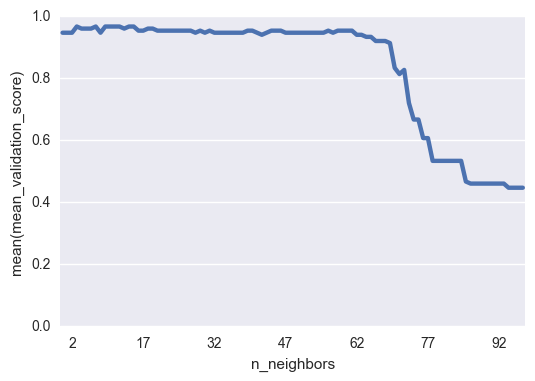

In [16]:
# Drops to zero as we use uniform weighting to converge on majority class
sns.pointplot(x='n_neighbors', y='mean_validation_score', data=grid, markers='')
plt.ylim(0, 1)
plt.xticks(np.arange(2, 100, 15), np.arange(2, 100, 15))

Let's "zoom in" to look at the fit before first dive around 70:

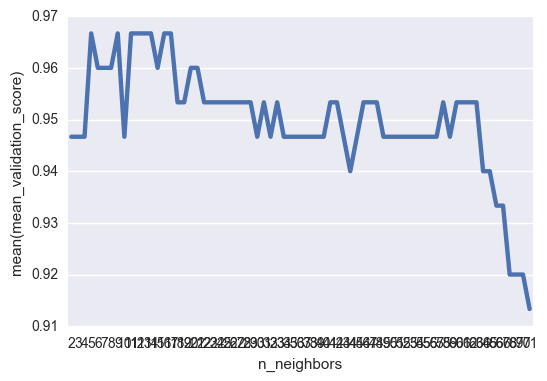

In [17]:
sns.pointplot(x='n_neighbors', y='mean_validation_score', data=grid.iloc[:70], markers='')

([<matplotlib.axis.XTick at 0x10d1804d0>,
 <a list of 7 Text xticklabel objects>)

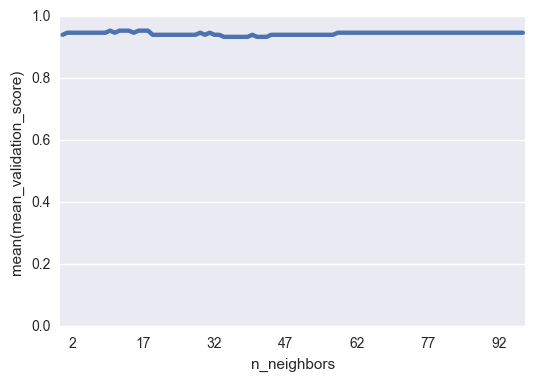

In [18]:
# Repeat using weights='distance', note how essential setting the axes are!
k = range(2, 100)
params = {'n_neighbors': k}
np.random.seed(1)
kf = cross_validation.KFold(len(X), n_folds = 5, shuffle=True)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(weights='distance'),
    param_grid=params,
    cv=kf,
)
gs.fit(X, y)

grid = pd.DataFrame(gs.grid_scores_)
grid['n_neighbors'] = grid['parameters'].apply(lambda x: x['n_neighbors'])
sns.pointplot(x='n_neighbors', y='mean_validation_score', data=grid, markers='')
plt.ylim(0, 1)
plt.xticks(np.arange(2, 100, 15), np.arange(2, 100, 15))

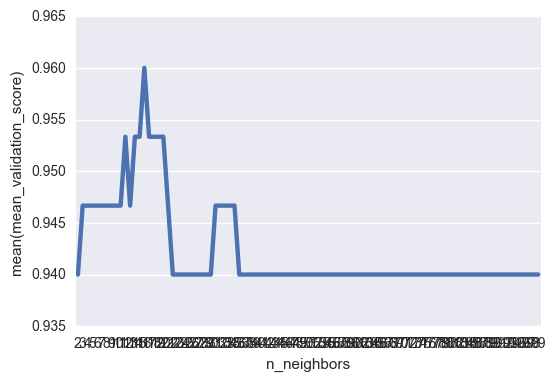

In [19]:
# Finally, try using Minkowsi distance metric (N.B. Euclidean distance is identical to Minkowski with p=2)
k = range(2, 100)
params = {'n_neighbors': k}
np.random.seed(1)
kf = cross_validation.KFold(len(X), n_folds = 5, shuffle=True)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(weights='distance', metric='minkowski', p=5),
    param_grid=params,
    cv=kf,
)
gs.fit(X, y)

grid = pd.DataFrame(gs.grid_scores_)
grid['n_neighbors'] = grid['parameters'].apply(lambda x: x['n_neighbors'])
sns.pointplot(x='n_neighbors', y='mean_validation_score', data=grid, markers='')

In [20]:
# Let's try optimise n_neighbors and weights and p simultaneously
np.random.seed(1)

# Parameter combinations to search over
params = {
    'n_neighbors': range(2, 120),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Do it
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=cross_validation.KFold(len(X), n_folds = 5, shuffle=True),
)
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=150, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, ...0, 111, 112, 113, 114, 115, 116, 117, 118, 119], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=1,
           weights='uniform')
Best cross-validated accuracy: 0.973333333333


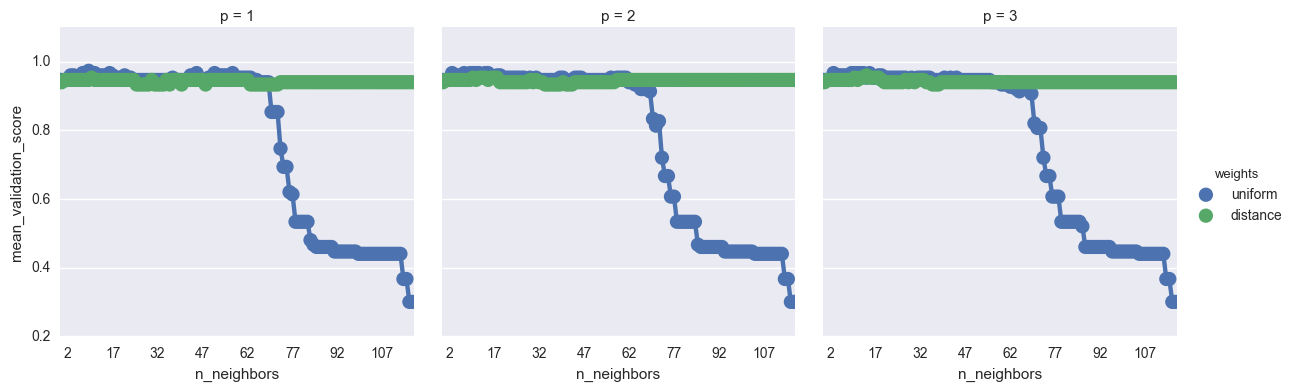

In [21]:
# Construct df with results
grid = pd.DataFrame(gs.grid_scores_)
for param in params.keys():
    grid[param] = grid['parameters'].apply(lambda x: x[param])

# Visualise many things at once
sns.factorplot(x='n_neighbors', y='mean_validation_score', hue='weights', col='p', data=grid)
plt.xticks(np.arange(2, 120, 15), np.arange(2, 120, 15))

print "Best estimator:", gs.best_estimator_
print "Best cross-validated accuracy:", gs.best_score_

#### Best model:
> 11 neighbours, uniform weights, Manhattan distance (Minkowski with p=1)